In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from sklearn.linear_model import LinearRegression

%matplotlib inline


## Exploratory data analysis 
1st plot

In [3]:
df_raw = pd.read_csv('temp_datalab_records_social_facebook.csv')
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 14 columns):
dataset_id             1048575 non-null int64
time                   1048575 non-null object
username               1016104 non-null object
checkins               1048575 non-null int64
has_added_app          1048575 non-null object
were_here_count        1048575 non-null int64
likes                  1048575 non-null int64
talking_about_count    1048575 non-null int64
facebook_id            1048575 non-null float64
date_added             0 non-null float64
date_updated           1047387 non-null object
entity_id              0 non-null float64
cusip                  0 non-null float64
isin                   0 non-null float64
dtypes: float64(5), int64(5), object(4)
memory usage: 112.0+ MB


In [3]:
df_raw.head()

,dataset_id,time,username,checkins,has_added_app,were_here_count,likes,talking_about_count,facebook_id,date_added,date_updated,entity_id,cusip,isin
0,53088,2015-01-01 05:00:00+00,SodaStream,0,f,0,761533,587,5.488562e+10,NaN,2017-02-14 03:35:13.236826+00,NaN,NaN,NaN
1,52642,2015-01-01 05:00:00+00,ANSYSInc,148,f,0,43442,1305,1.602420e+14,NaN,2017-02-14 01:55:52.78506+00,NaN,NaN,NaN
2,53656,2015-01-01 05:00:00+00,MyAquaAmerica,0,f,0,5591,297,5.916940e+14,NaN,2017-02-14 08:13:51.267343+00,NaN,NaN,NaN
3,53033,2015-01-01 05:00:00+00,Qualcomm,173,f,0,1232521,2685,1.084730e+11,NaN,2017-02-14 03:24:04.363035+00,NaN,NaN,NaN
4,52783,2015-01-01 05:00:00+00,eaglepharmaceuticals,0,f,0,18,0,1.428270e+15,NaN,2017-02-14 02:22:10.193588+00,NaN,NaN,NaN


In [4]:
df_raw.shape

(1048575, 14)

In [23]:
# set(df_raw[~df_raw['username'].isnull()]['username']) 
# df_raw[~df_raw['likes'].isnull()]['likes']



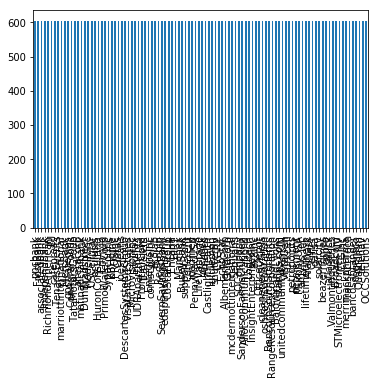

In [12]:
df_raw['username'].value_counts()[:100].plot(kind = 'bar')

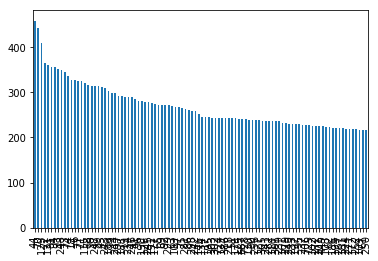

In [15]:
df_raw['likes'].value_counts()[:100].plot(kind = 'bar')

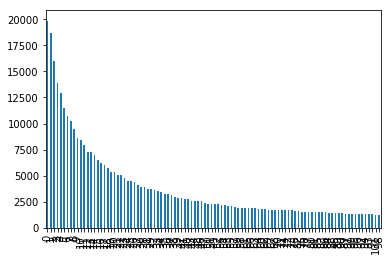

In [17]:
df_raw['talking_about_count'].value_counts()[:100].plot(kind = 'bar')

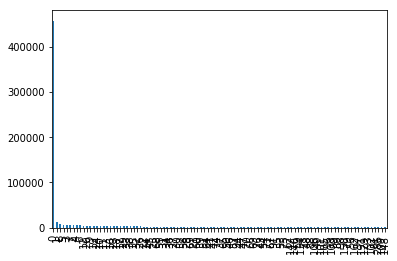

In [18]:
df_raw['checkins'].value_counts()[:100].plot(kind = 'bar')

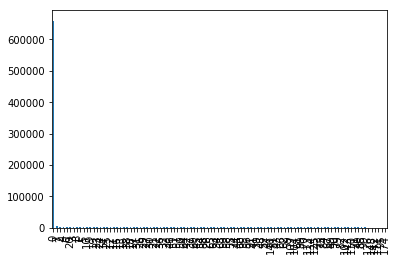

In [22]:
df_raw['were_here_count'].value_counts()[:100].plot(kind = 'bar')

In [28]:
df_likes = df_raw.sort_values(['likes'], ascending = [False])

for company in list(set(df_likes[~df_likes['username'].isnull()]['username']))[:10]:
    print(company,df_likes[df_likes['username'] == company]['likes'].shape)

transgenomiclab (478,)
ManitexInternational (604,)
graydcbureau (246,)
realtor.com (32,)
cosmoprofbeauty (297,)
Symantec (596,)
fairandlovelyindia (274,)
AmanaBrand (295,)
grubhub (471,)
avlcitizentimes (45,)


In [6]:
likes_for_company = {}

for company in list(set(df_raw[~df_raw['username'].isnull()]['username']))[:100]:
#     subdf = df_raw[df_raw['username'] == company]
#     like_average = subdf['likes'].mean(axis = 0, skipna = True)

    like_average = df_raw[df_raw['username'] == company]['likes'].mean(axis = 0, skipna = True)
    
    likes_for_company.update({company: like_average})

print(likes_for_company)



{'BridgepointEducation': 749.487964989059, 'coremarkinternational': 4903.774193548387, 'samsclub': 2670483.5102739725, 'McCormickSpice': 1602115.6772823778, 'CubeSmart': 20730.699159663865, 'priceline': 661051.1388888889, 'FathomTravel': 45289.35256410256, 'obBrand': 35842.83400809717, 'dressbarn': 878932.0353260869, 'lazboy': 722088.3489361702, 'BMBWOhio': 21533.36842105263, 'fidomobile': 433531.47222222225, 'advanceautoparts': 1711737.2360876896, 'sharecare': 167568.3488372093, 'megabloksofficial': 446896.1498127341, 'BorgataAC': 239911.05172413794, 'Interglobetech': 15092.543795620439, 'solarcity': 154041.2417218543, 'PeterbiltMotors': 120410.58053691275, 'AvidTechnology': 176779.73913043478, 'FederatedInvestors': 520.4957118353345, 'bpnww': 978.375415282392, 'MarineMaxConnecticut': 463.1219512195122, 'WhiteHallJournalNewspaper': 5128.565040650406, 'scegnews': 32232.875, 'GoogleAnalytics': 24285.44407894737, 'Qualcomm': 2082259.6622516557, 'valleyfair': 236302.7724137931, 'GildanOnl

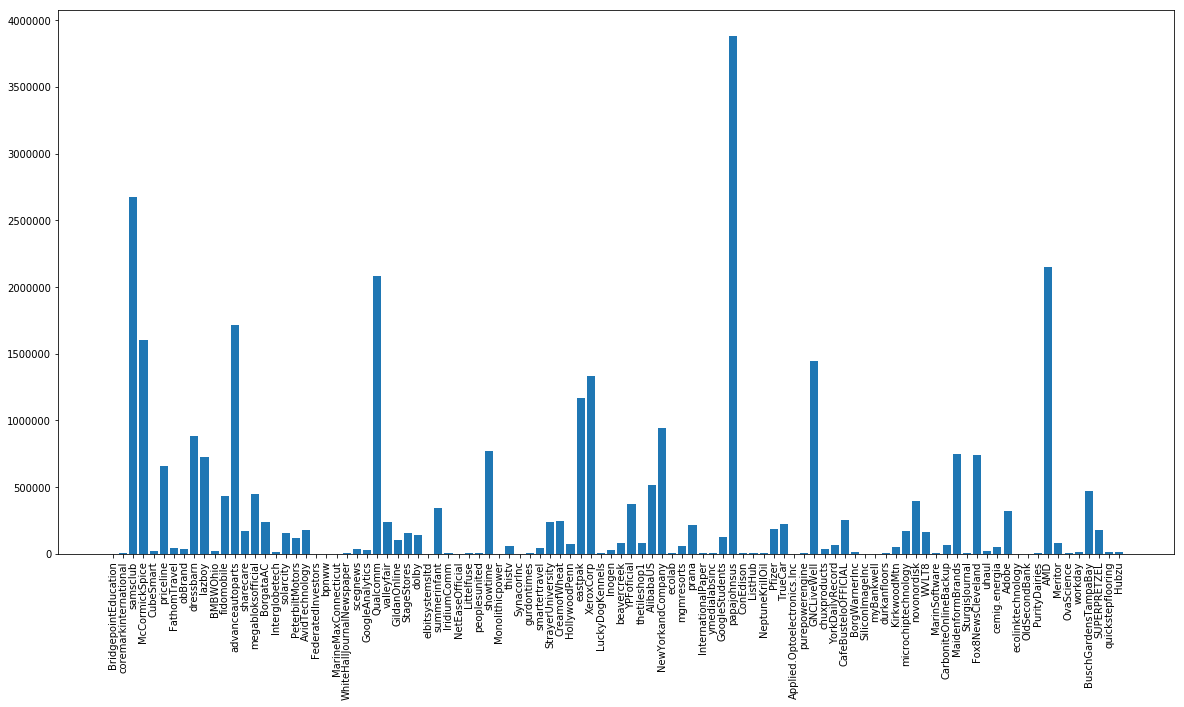

In [21]:
plt.figure(figsize=(20,10))
plt.bar(*zip(*likes_for_company.items()))
plt.xticks(rotation=90)

plt.show()
